# **Industrial Copper Modeling**

# Importing Libraries

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelBinarizer
from sklearn.metrics import  classification_report, roc_curve, auc
#To ignore warnings
import warnings
warnings.filterwarnings("ignore")


# Loading Dataset

In [79]:
# Read the CSV file into a pandas dataframe
df = pd.read_csv("/content/INDUSTRY_COPPER.csv")


In [80]:
# Checking size(rows,columns) of dataset
df.shape

(181673, 14)

In [81]:
#To display top 5 row in dataset
df.head()

,id,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [82]:
#To display Bottom 5 rows
df.tail()

,id,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,1000777,164141591,20200701.0,591.0
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,1000227,164141591,20200701.0,589.0
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,1004216,164141591,20200701.0,619.0
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,1001149,164141591,20200701.0,601.0
181672,AD0CA853-AE3C-4B2F-9FBB-8B0B965F84BC,20200702.0,406.6865384,30200854.0,25.0,Won,W,41.0,0.71,1240.0,1005439,164141591,20200701.0,607.0


In [83]:
#To view the column names
df.columns

Index(['id', 'item_date', 'quantity_tons', 'customer', 'country', 'status',
       'item_type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

# Data Preprocessing

**Data Cleaning**

In [84]:
df.nunique()

id               181671
item_date           252
quantity_tons    181673
customer           1169
country              17
status                9
item_type             7
application          30
thickness           594
width              1386
material_ref      16410
product_ref          33
delivery date        28
selling_price      9795
dtype: int64

#### check null values, shape and data types before dealing with incorrect data 

# Missing Values

In [85]:
#checking for null values
df.isnull().sum()

id                   2
item_date            1
quantity_tons        0
customer             1
country             28
status               2
item_type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity_tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item_type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


### Dealing with data in wrong format

In [87]:
# dealing with data in wrong format
# for categorical variables, this step is ignored
# df = df[df['status'].isin(['Won', 'Lost'])]
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['quantity_tons'] = pd.to_numeric(df['quantity_tons'], errors='coerce')
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df['country'] = pd.to_numeric(df['country'], errors='coerce')
df['application'] = pd.to_numeric(df['application'], errors='coerce')
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df['material_ref'] = df['material_ref'].str.lstrip('0')
df['product_ref'] = pd.to_numeric(df['product_ref'], errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')


#### Nan values and shape after dealing with data in wrong format

In [88]:
missing_values_count = df.isnull().sum()
print(missing_values_count)
print(df.shape)
df.info()

id                   2
item_date            3
quantity_tons        1
customer             1
country             28
status               2
item_type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        3
selling_price        1
dtype: int64
(181673, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181670 non-null  object 
 2   quantity_tons  181672 non-null  float64
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item_type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 

### Dealing with Missing Values

In [89]:
# material_ref has large set of null values, so replacing them with unknown 
df['material_ref'].fillna('unknown', inplace=True)
# deleting the remaining null values as they are less than 1% of data which can be neglected
df = df.dropna()

In [90]:
missing_values_count = df.isnull().sum()
print(missing_values_count)
print(df.shape)

id               0
item_date        0
quantity_tons    0
customer         0
country          0
status           0
item_type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64
(181631, 14)


# Finding Duplicate Values

In [91]:
#checking for no of duplicate values
df.duplicated().sum()

0

In [92]:
df1=df.copy()

# Skewness Deduction and Correction

skewness values before transformation

In [93]:
print('Skewness:', skew(df1['quantity_tons']))
print('Skewness:', skew(df1['country']))
print('Skewness:', skew(df1['application']))
print('Skewness:', skew(df1['thickness']))
print('Skewness:', skew(df1['width']))
print('Skewness:', skew(df1['selling_price']))

Skewness: 424.63821570967093
Skewness: 0.7535772823154291
Skewness: 0.7243181557106211
Skewness: 303.46908538522666
Skewness: 0.37484155989536533
Skewness: 301.35075873520265


plotting skewness before applying transformation

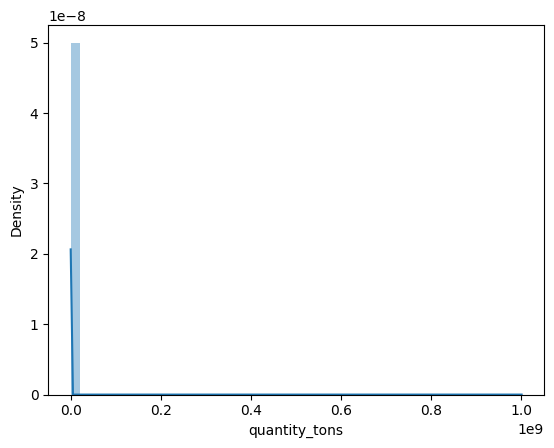

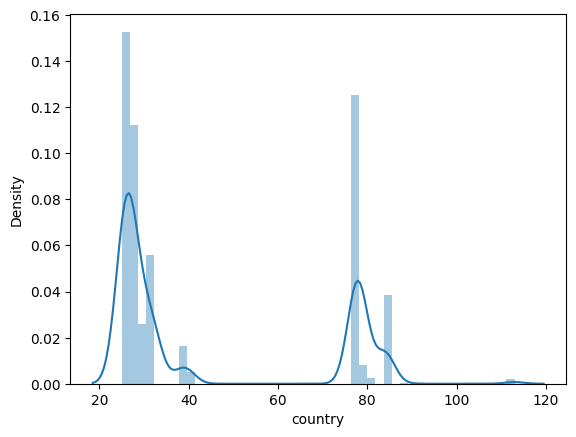

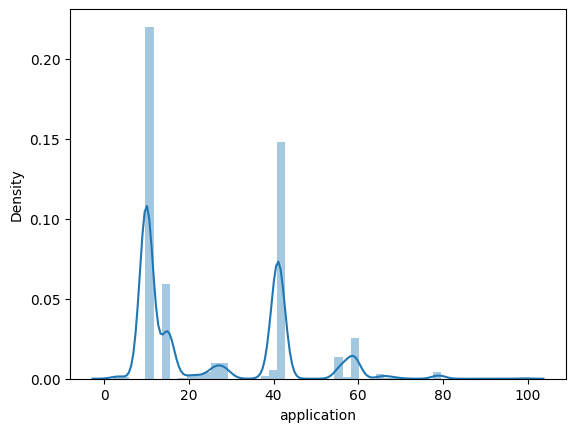

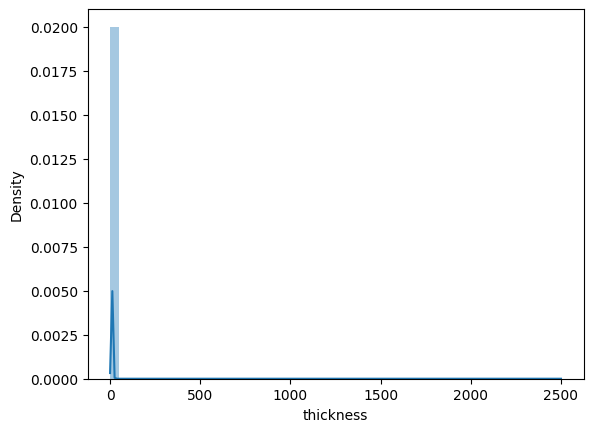

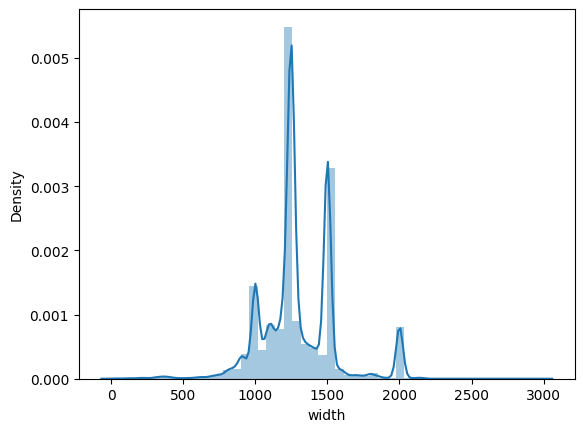

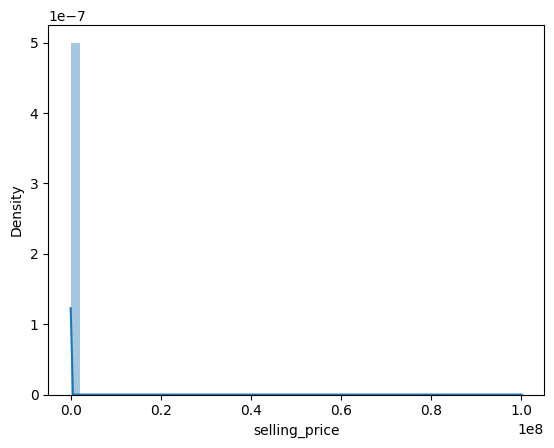

In [94]:
# ['quantity_tons','selling_price','application','thickness','width', 'country']
# ['status','item type']

df1['quantity_tons']   # skewed
df1['country']
df1['application']
df1['thickness']       # skewed
df1['width']           
df1['selling_price']   # skewed

import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df1['quantity_tons'])
plt.show()
sns.distplot(df1['country'])
plt.show()
sns.distplot(df1['application'])
plt.show()
sns.distplot(df1['thickness'])
plt.show()
sns.distplot(df1['width'])
plt.show()
sns.distplot(df1['selling_price'])
plt.show()


In [95]:
import numpy as np
mask1 = df1['selling_price'] <= 0
print(mask1.sum())
df1.loc[mask1, 'selling_price'] = np.nan

mask1 = df1['quantity_tons'] <= 0
print(mask1.sum())
df1.loc[mask1, 'quantity_tons'] = np.nan

mask1 = df['thickness'] <= 0
print(mask1.sum())
df1.loc[mask1, 'thickness'] = np.nan

7
4
0


In [96]:
df1.isnull().sum()

id               0
item_date        0
quantity_tons    4
customer         0
country          0
status           0
item_type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    7
dtype: int64

In [97]:
df1.dropna(inplace=True)
len(df1)

181620

plotting skewness after applying transformation

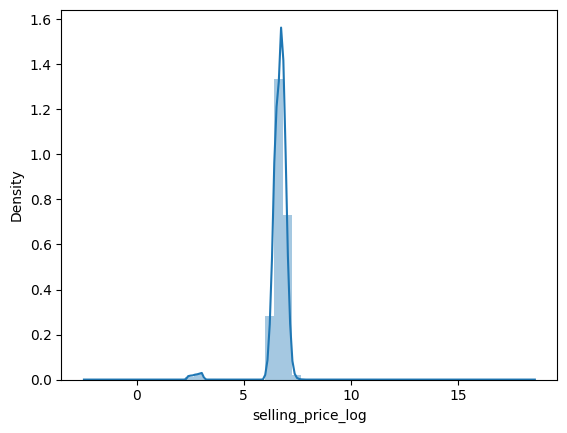

Skewness: -5.342755228594173


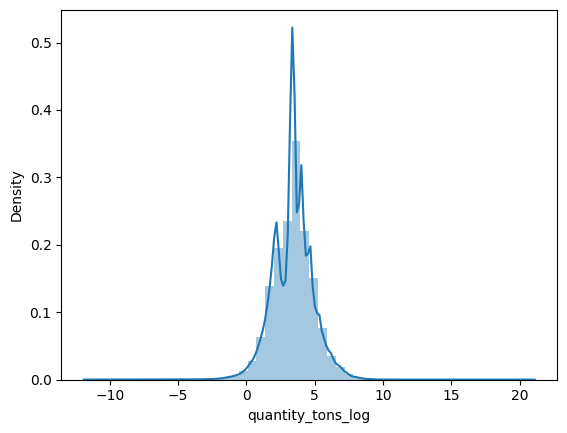

Skewness: -0.06876938476345296


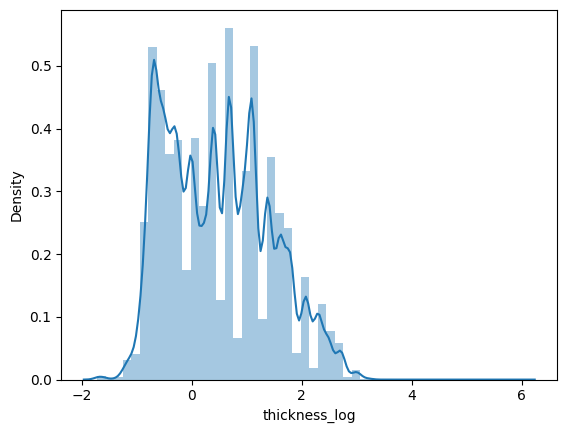

Skewness: 0.3491224330194453


In [98]:
import numpy as np
df1['selling_price_log'] = np.log(df1['selling_price'])
sns.distplot(df1['selling_price_log'])
plt.show()
print('Skewness:', skew(df1['selling_price_log']))

df1['quantity_tons_log'] = np.log(df1['quantity_tons'])
sns.distplot(df1['quantity_tons_log'])
plt.show()
print('Skewness:', skew(df1['quantity_tons_log']))

df1['thickness_log'] = np.log(df1['thickness'])
sns.distplot(df1['thickness_log'])
plt.show()
print('Skewness:', skew(df1['thickness_log']))

In [ ]:
df1.head()

,id,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,selling_price_log,quantity_tons_log,thickness_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,6.749931,3.991779,0.693147
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,6.953684,6.643822,-0.223144
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,6.468211,5.956169,-0.967584
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,6.643790,5.310301,0.832909
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,6.357842,6.666354,1.386294


**EDA**

**SKEWNESS VISUALIZATION**

**visualize skewness using boxplot, violinplot, and distplot before transformation**

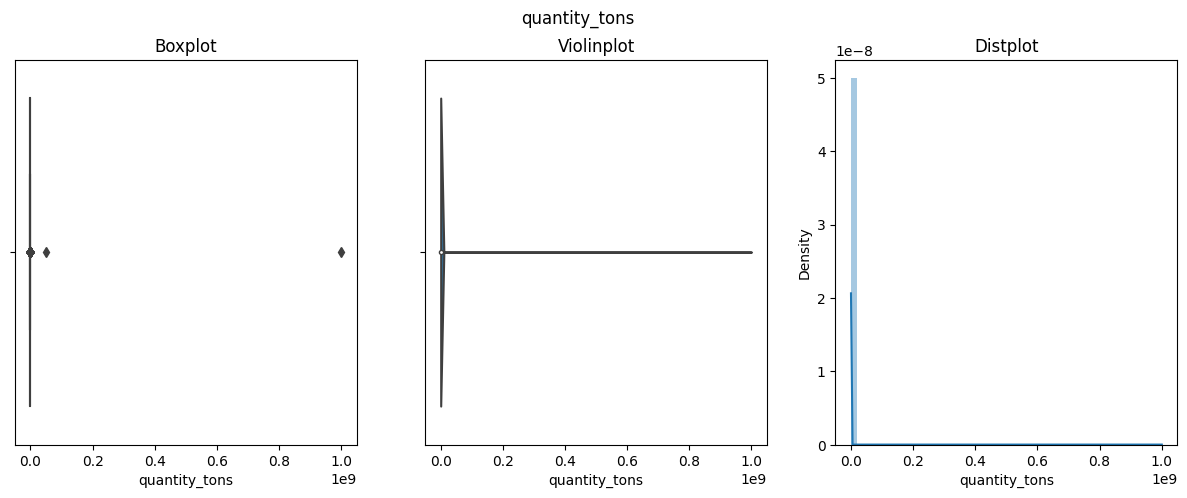

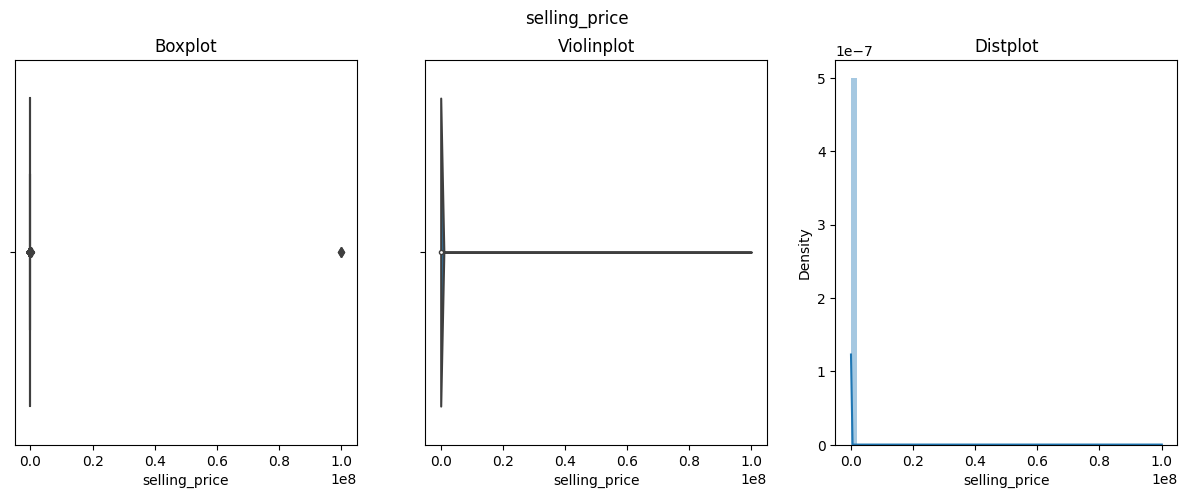

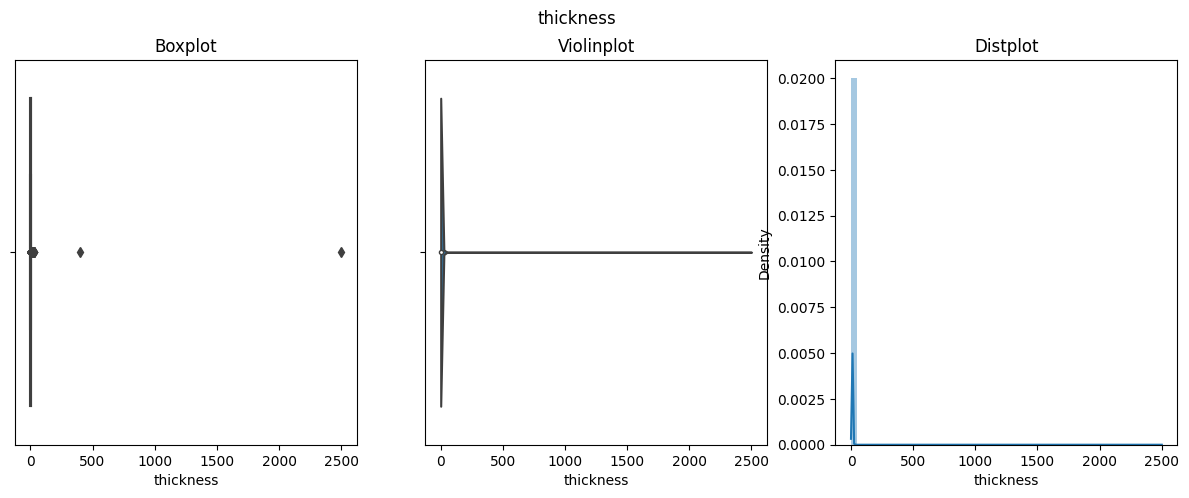

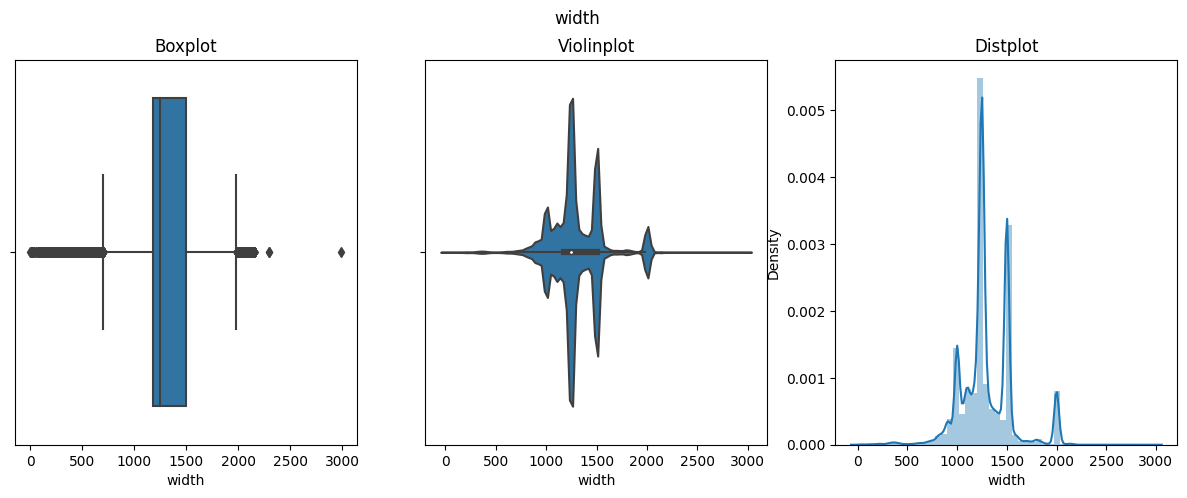

In [ ]:
# visualize skewness using boxplot, violinplot, and distplot
import seaborn as sns
import matplotlib.pyplot as plt
cols = ['quantity_tons', 'selling_price', 'thickness','width' ] 
for col in cols:
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(col)

    # boxplot
    sns.boxplot(x=df[col], ax=ax[0])
    ax[0].set_title('Boxplot')

    # violinplot
    sns.violinplot(x=df[col], ax=ax[1])
    ax[1].set_title('Violinplot')

    # distplot
    sns.distplot(df[col], ax=ax[2])
    ax[2].set_title('Distplot')

    plt.show()

**visualize skewness using boxplot, violinplot, and distplot after transformation**

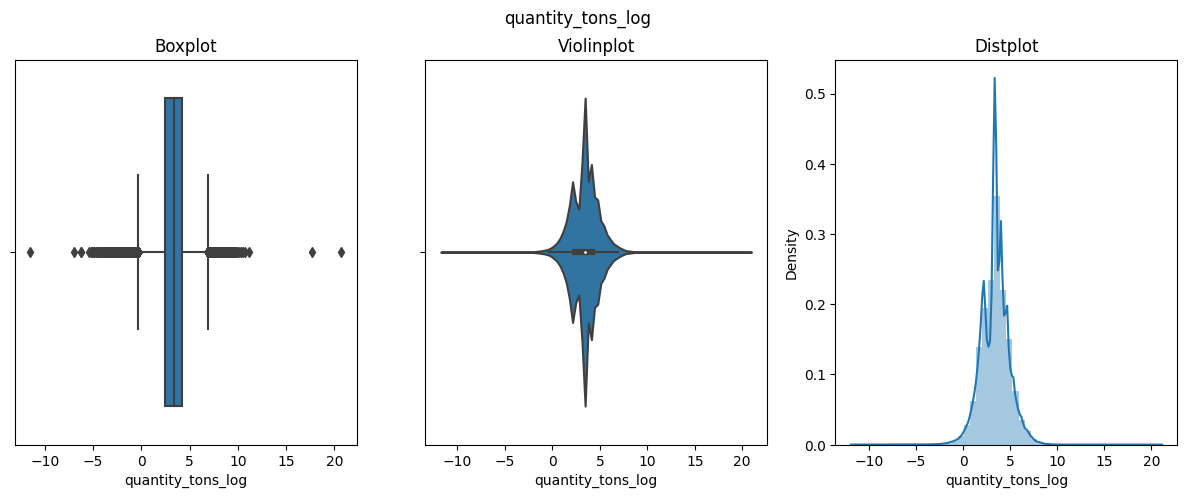

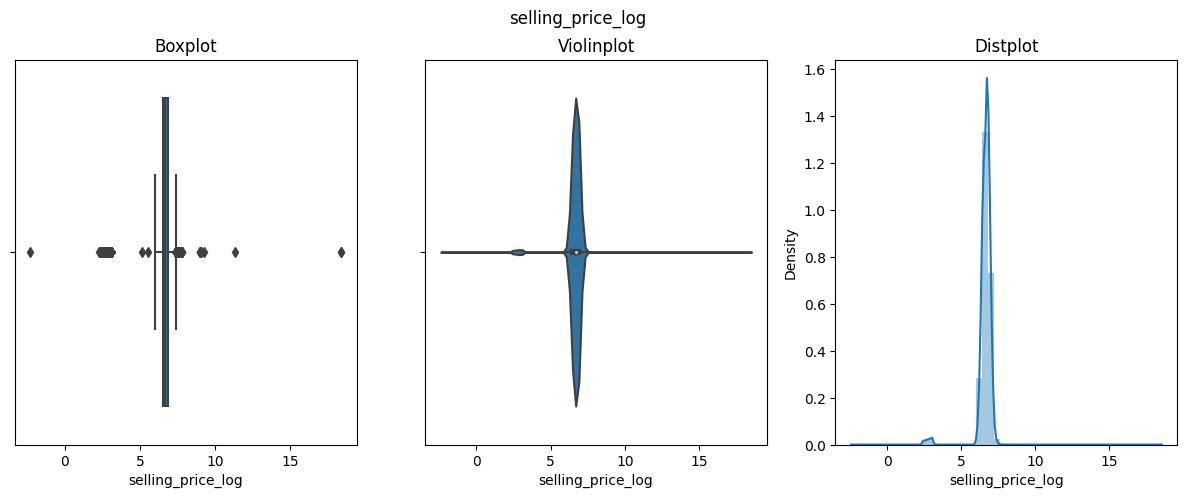

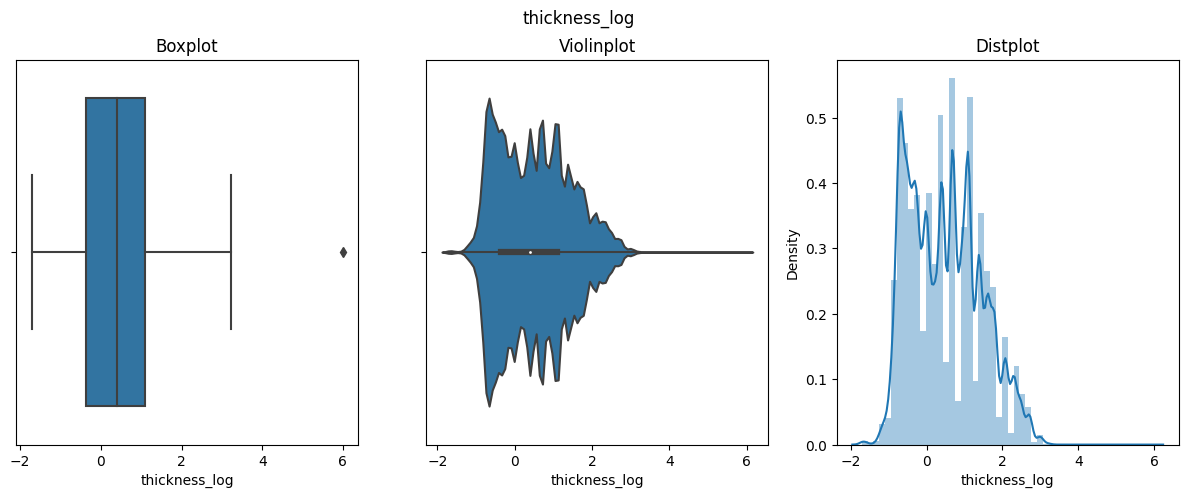

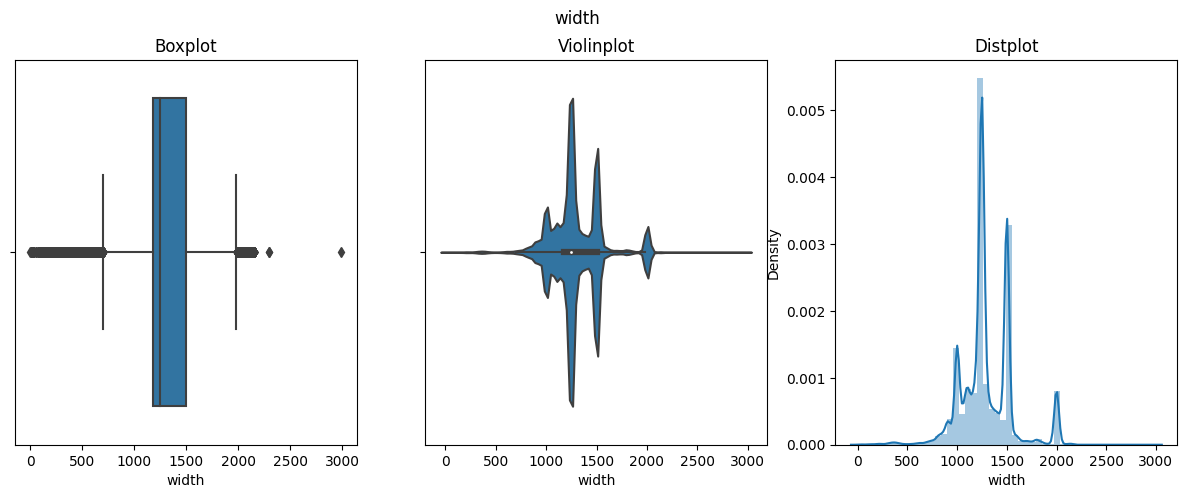

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
cols = ['quantity_tons_log', 'selling_price_log', 'thickness_log', 'width'] 
for col in cols:
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(col)

    # boxplot
    sns.boxplot(x=df1[col], ax=ax[0])
    ax[0].set_title('Boxplot')

    # violinplot
    sns.violinplot(x=df1[col], ax=ax[1])
    ax[1].set_title('Violinplot')

    # distplot
    sns.distplot(df1[col], ax=ax[2])
    ax[2].set_title('Distplot')

    plt.show()

 PLOT OF UNIQUE VALUE

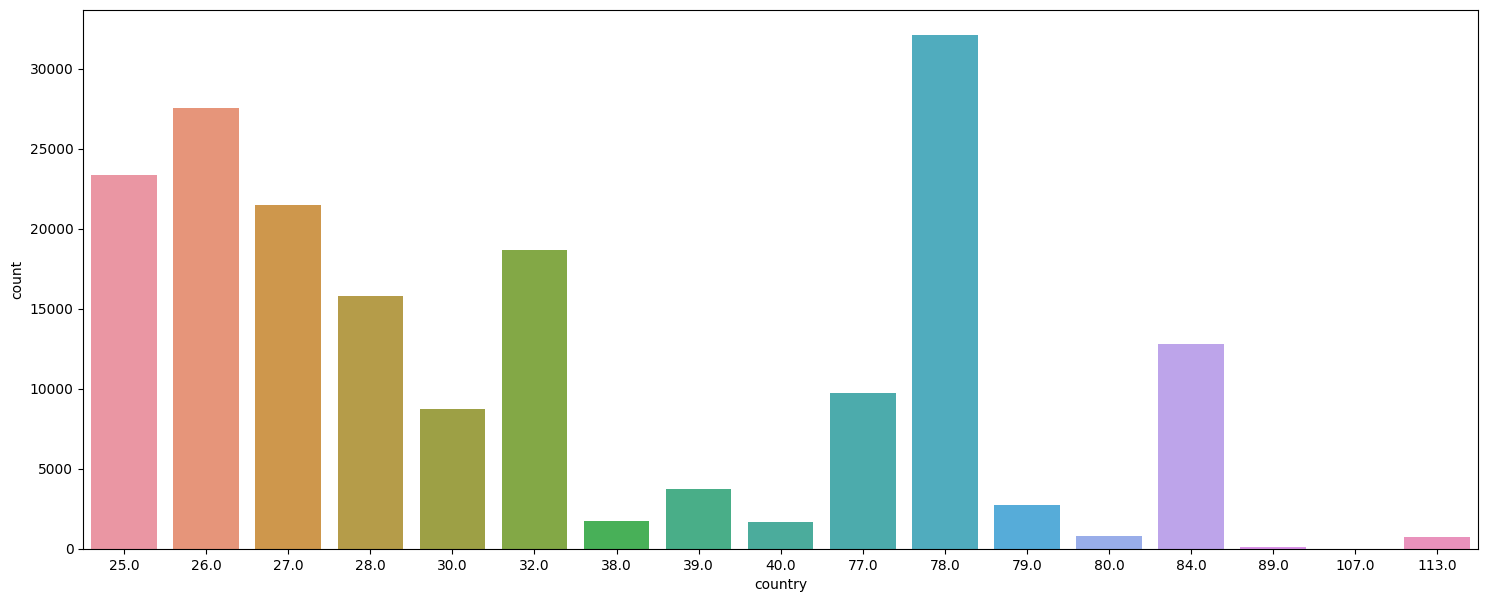

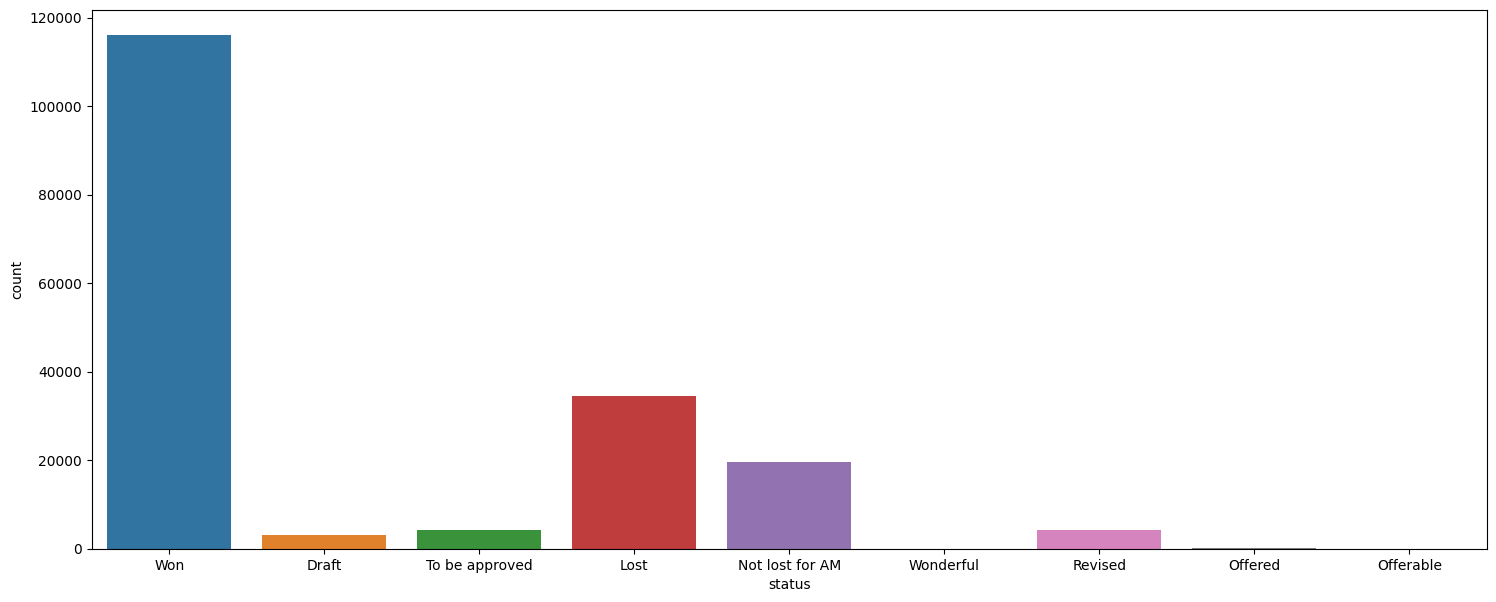

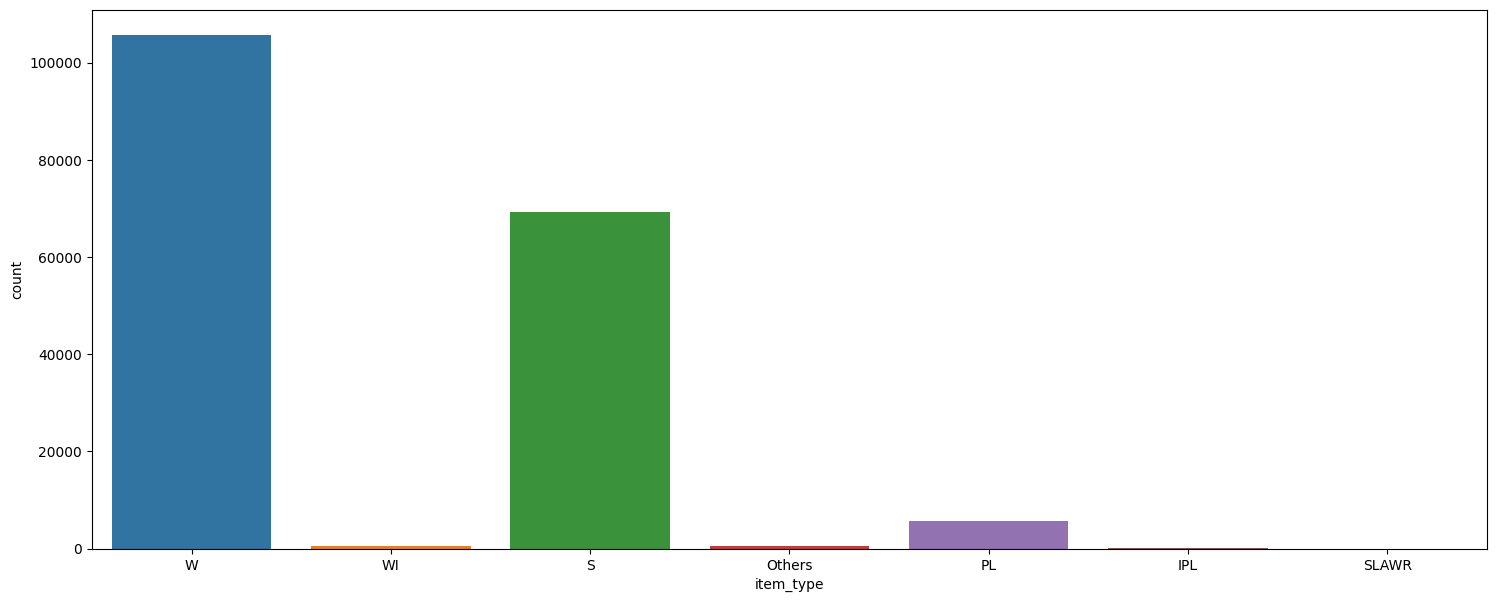

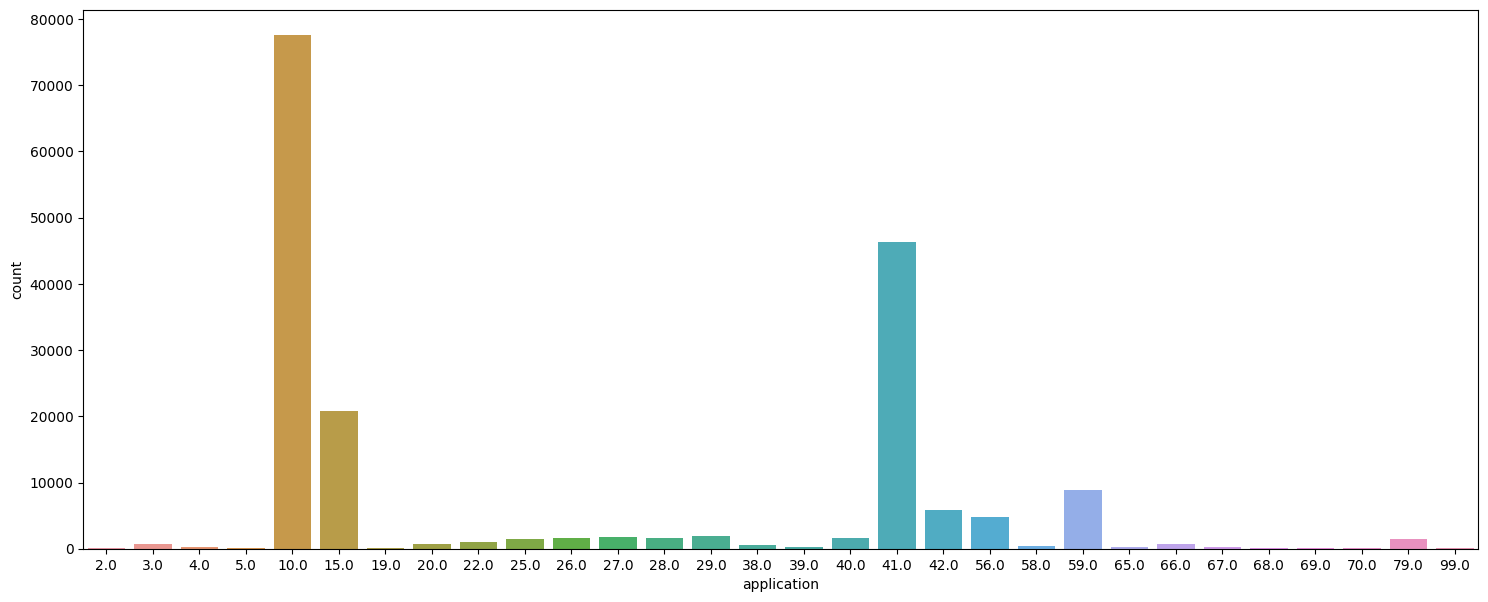

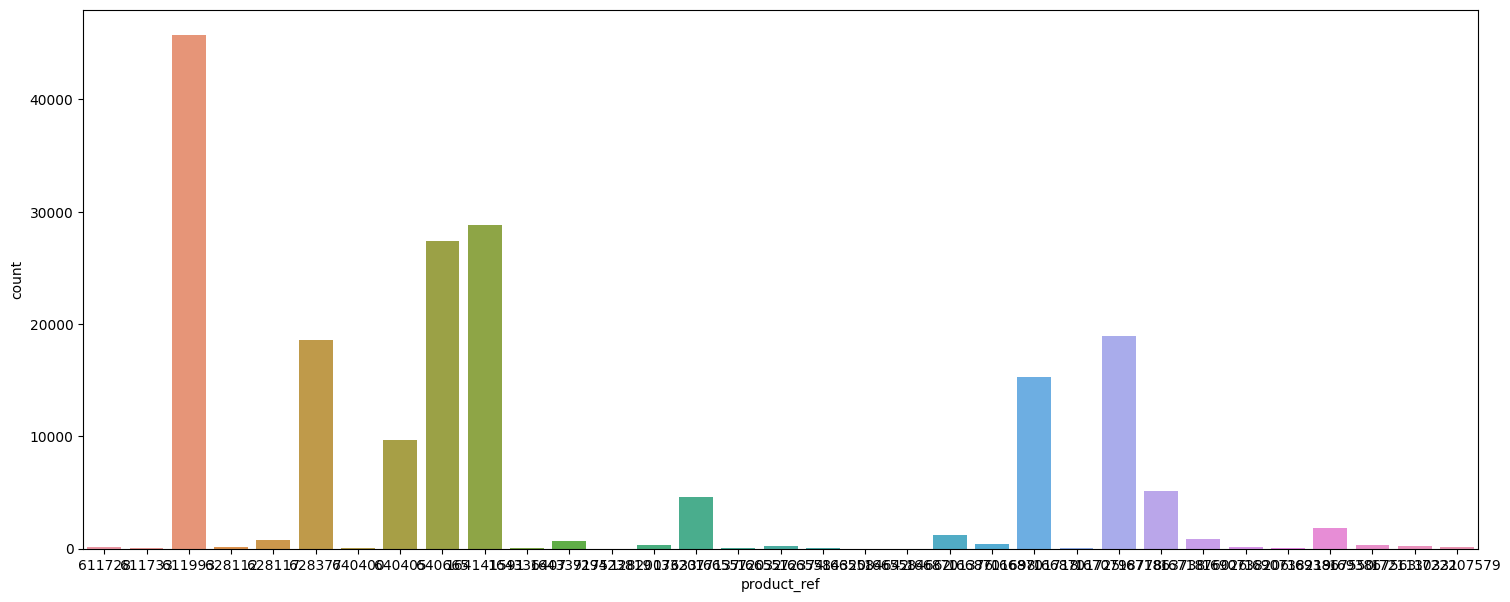

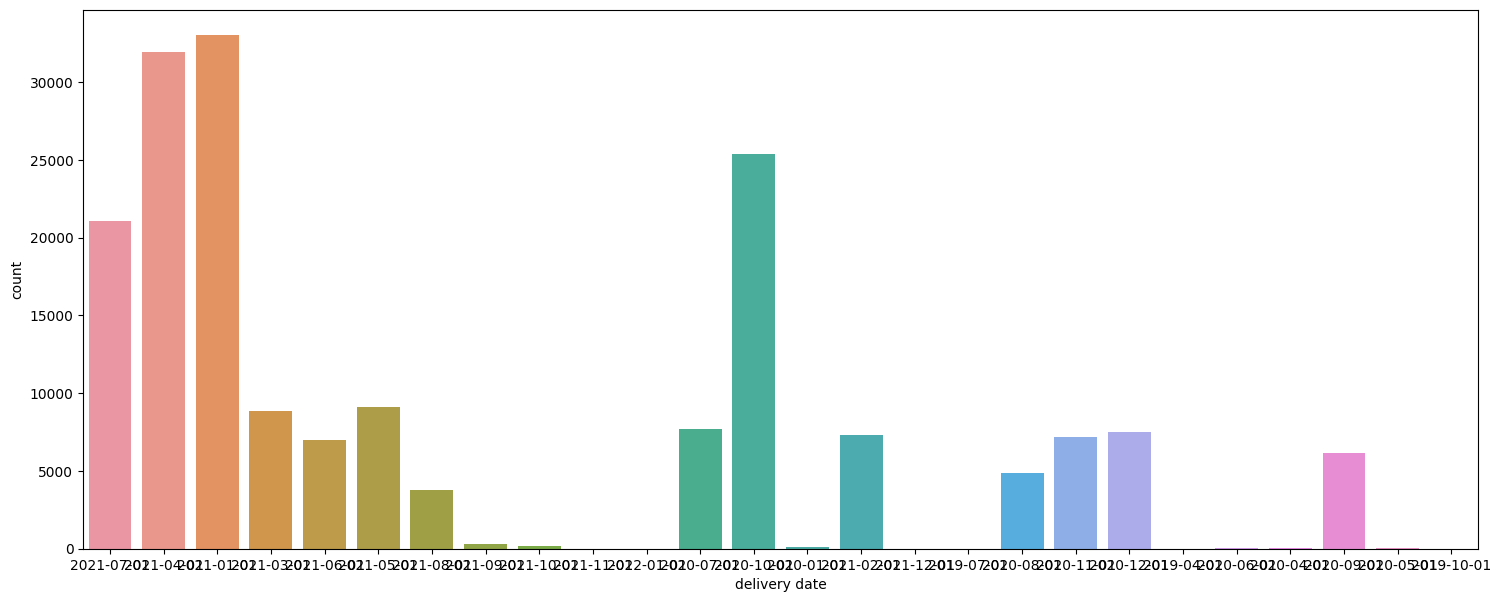

In [ ]:
for i in df.columns:
  if(df1[i].nunique()<35):
    plt.figure(figsize=(18,7))
    sns.countplot(x=df[i])
    plt.show()

In [ ]:
x=df1[['quantity_tons_log','application','thickness_log','width','selling_price_log','country','customer','product_ref']].corr()

<Axes: >

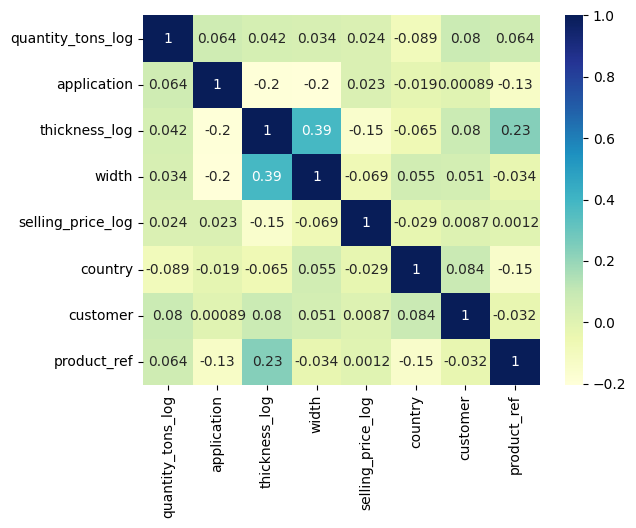

In [ ]:
sns.heatmap(x, annot=True, cmap="YlGnBu")

# **MODEL**

# DECISION TREE REGRESSOR

**Feature and Target Selection**

In [ ]:
# X --> Feature y-- >target
X=df1[['quantity_tons_log','status','item_type','application','thickness_log','width','country','customer','product_ref']]
y=df1['selling_price_log']

**Encode**

In [ ]:
# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['item_type']])
X_ohe = ohe.fit_transform(X[['item_type']]).toarray()
ohe2 = OneHotEncoder(handle_unknown='ignore')
ohe2.fit(X[['status']])
X_be = ohe2.fit_transform(X[['status']]).toarray()
# independent features after encoding
X = np.concatenate((X[['quantity_tons_log', 'application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe, X_be), axis=1)

**split**

In [ ]:
# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

**scale**

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Decision Tree Regressor model**

In [ ]:
dtr = DecisionTreeRegressor()
# hyperparameters
param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}
# gridsearchcv
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
# evalution metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

Best hyperparameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10}
Mean squared error: 0.024613165611500204
R-squared: 0.9249579309488095


 Predict the selling price for new values

In [ ]:
# ['quantity tons_log', 'application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe, X_be
new_sample = np.array([[np.log(40), 10, np.log(250), 0, 28,30202938,1670798778,'PL','Won']])
new_sample_ohe = ohe.transform(new_sample[:, [7]]).toarray()
new_sample_be = ohe2.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,]], new_sample_ohe, new_sample_be), axis=1)
new_sample1 = scaler.transform(new_sample)
new_pred = best_model.predict(new_sample1)
print('Predicted selling price:', np.exp(new_pred))

Predicted selling price: [628.28578452]


Saving the model

In [ ]:
# Saving the model
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('t.pkl', 'wb') as f:
    pickle.dump(ohe, f)
with open('s.pkl', 'wb') as f:
    pickle.dump(ohe2, f)

In [ ]:
print(len(df1))
df1.head(3)

181620


,id,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,selling_price_log,quantity_tons_log,thickness_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,6.749931,3.991779,0.693147
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,6.953684,6.643822,-0.223144
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,6.468211,5.956169,-0.967584


In [ ]:
df2 = df1[df1['status'].isin(['Won', 'Lost'])]
len(df2)

150427

## DECISION TREE CLASSIFIER

**Feature and Target Selection**

In [ ]:
## X --> Feature y-- >target
X= df2[['quantity_tons_log','selling_price_log','item_type','application','thickness_log','width','country','customer','product_ref']]
Y = df2['status']

**Encode**

In [ ]:
# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['item_type']])
X_ohe = ohe.fit_transform(X[['item_type']]).toarray()
be = LabelBinarizer()
be.fit(Y) 
y = be.fit_transform(Y)
# independent features after encoding
X = np.concatenate((X[['quantity_tons_log', 'selling_price_log','application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe), axis=1)

**split**

In [ ]:
# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

**scale**

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Decision tree classifier model**

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")


Accuracy: 0.9124509738748919
Confusion Matrix:
[[ 5727  1295]
 [ 1339 21725]]


Evalution Metrics

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      7022
           1       0.94      0.94      0.94     23064

    accuracy                           0.91     30086
   macro avg       0.88      0.88      0.88     30086
weighted avg       0.91      0.91      0.91     30086

Classification Report:


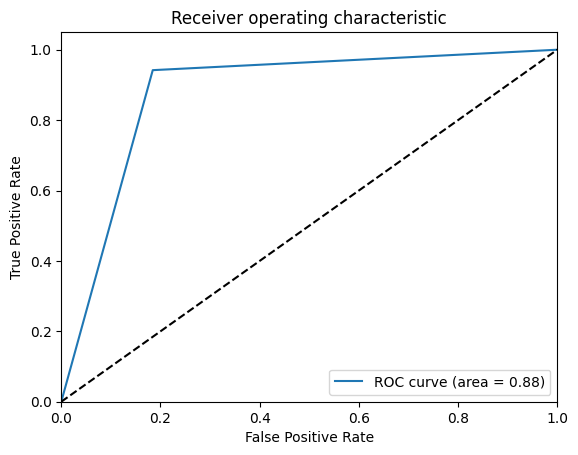

In [ ]:
# Evalution Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
print(classification_report(y_test, y_pred))
print("Classification Report:")
# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Predict the status for a new sample

In [ ]:
# Predict the status for a new sample
# 'quantity tons_log', 'selling_price_log','application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe
new_sample = np.array([[np.log(630), np.log(986), 41, np.log(2),1200,25.0,30202938,1670798778,'W']])
new_sample_ohe = ohe.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,7]], new_sample_ohe), axis=1)
new_sample = scaler.transform(new_sample)
new_pred = dtc.predict(new_sample)
if new_pred==1:
    print('The status is: Won')
else:
    print('The status is: Lost')

The status is: Won


In [ ]:
# Saving the model
import pickle
with open('cmodel.pkl', 'wb') as file:
    pickle.dump(dtc, file)
with open('cscaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('ct.pkl', 'wb') as f:
    pickle.dump(ohe, f)